In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import os
hf = r'../outputs/2.2_urban_data_mining/'
os.makedirs(hf, exist_ok=True)

# 2.2 Urban Data Mining

Urban Data Mining, or the process of collecting and preparing data for analysis, consisted of two stages, which can be divided into manual collection and automated data preparation. The purpose of the manual stage was to collect data and convert it into tabular form, while the automated process was aimed to convert the tabular data into geospatial data.

# Manual Data Collection
  
The main task of manual data collection is searching purpose-built student accommodation and higher education universities in Berlin and collecting capacity and demand data, respectively. 

### Student Accommodation

The Studentenwerk (StW, 2025) website was used as the initial source of data for the purpose of building student accommodation. StW is a public, non-profit organisation that provides essential services to students in Germany, including affordable housing, operating student dormitories in collaboration with universities. The StW website provides not only detailed information about addresses, prices, accommodation types, and living space in student accommodation, but also references to other publicly funded companies that provide social housing for students, such as Howoge, Gewobag, Berlinvo, and others. Data on the capacity of public student dormitories was collected from the Study in Germany website, which is supported by the Federal Ministry of Education and Research (BMBF, 2025) and is part of the ‘Germany – Land of Ideas’ campaign.    
  
The missing addresses of private companies were collected from online platforms of companies specialising in student housing and property rental in Berlin. While public companies publish data openly, private companies have less transparent policy, which limits the research process and complicates the manual data mining process. 

A complete list of online sources used for manual data collection on student accommodation is presented in Table XX.

In [3]:
sp = r"../inputs/2.2_urban_data_mining/urban_data_mining_sourses.xlsx"

sourses = pd.read_excel(sp)
sourses[[
    "sourse",
    "comment¹",
    "link",
]].head(23)

,sourse,comment¹,link
0,Study in Germany,An official informational platform aimed at in...,https://www.study-in-germany.com/de/
1,HOWOGE Wohnungsbaugesellschaft mbH,Municipal housing company with dedicated stude...,https://www.howoge.de/immobiliensuche/neubaupr...
2,GESOBAU AG,Public housing provider offering projects like...,https://www.gesobau.de/wohnungsbau/neubauprojekte
3,GEWOBAG,"New-build and modernized housing projects, som...",https://www.gewobag.de/
4,WBM,Municipal housing firm offering apartments in ...,https://www.wbm.de/neubau-berlin/
5,Berlinovo,Offers student apartments across Berlin. Filte...,https://www.berlinovo.de/de/apartments
6,BGG Berlin,Private housing group with student-suitable ap...,https://www.bgg-berlin.com/de
7,STW Berlin,Official student dorm provider in Berlin; list...,https://www.stw.berlin/en/
8,Studentendorf Berlin,Community-oriented residences in Adlershof and...,https://www.studentendorf.berlin/
9,The FIZZ,International student housing brand; premium h...,https://www.the-fizz.com/en/


*Table XX. Manual Data Collection Sources for Student Accommodation*

The address is a critical parameter for conducting spatial econometric analysis. However, many student accommodations have more than one building. For example, WH Spandauer Damm comprises five buildings located at Spandauer Damm 134–142 (Studierendenwerk Berlin, 2025). During manual data collection, one of the tasks was to collect unique addresses related to the student housing market in order to calculate centroids afterwards, during automated data preparetion.

For student housing, the data collected included the address (`street`, `house_nummer`, `plz`, `city`), the name of the building complex (`name`), the ownership company name (`ownership`), the ownership model (`ownership model`), number of residential units (`!units`), their capacity (`!students`) and type (`units type`), maximum and minimum price (`price_min`, `price_max`), maximum and minimum living space (`area_min`, `area_max`), link to the source (`link`).   

As a result of manual data collection, data was collected on 94 proposed student accommodation buildings located at 171 unique addresses. 

In [3]:
fp = r"../inputs/2.2_urban_data_mining/input_pbsa.xlsx"

pbsa = pd.read_excel(fp, sheet_name='SA', dtype={'street': str, 'house_nummer': str, 'plz': str})

In [4]:
pbsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             171 non-null    object 
 1   street           171 non-null    object 
 2   house_nummer     171 non-null    object 
 3   plz              171 non-null    object 
 4   city             171 non-null    object 
 5   model            171 non-null    object 
 6   ownership        171 non-null    object 
 7   ownership_model  171 non-null    object 
 8   !units           93 non-null     float64
 9   !students        148 non-null    float64
 10  units type       168 non-null    object 
 11  price_min        148 non-null    float64
 12  price_max        96 non-null     float64
 13  area_min         154 non-null    float64
 14  area_max         144 non-null    float64
 15  link             168 non-null    object 
dtypes: float64(6), object(10)
memory usage: 21.5+ KB


### Higher Education Universities

In order to indicate Berlin's student demand, it was necessary to collect data on all of Berlin's higher education institutions and the number of students enrolled in them. Although the initial plan was to limit the search to public educational institutions only. Nevertheless during the data collection process it became evident that the list and statistics for private universities were also publicly available.

The dataset provided by the Statistisches Bundesamt (DESTATIS, 2025) serves as the most comprehensive source, capturing detailed information on student enrollments, origin, and gender at public and private German higher education institutions. The data provided was so detailed that it included information about branches of Berlin universities in other regions of the country. For example, Media Design School Berlin also has a campus in Munich. These universities  were excluded from the statistics as they do not put pressure on the Berlin Student Housing Market.

After cleaning, the Higher Education Institution list from the Federal Statistical Office was double-checked with the official Berlin city directory of higher education institutions (Berlin City Portal, 2025) and the official registry maintained by the German Rectors' Conference (Hochschul Kompass, 2025).

A complete list of online sources used for manual data collection on higher education institutions is provided in Table XX.

In [4]:
sourses[[
    "sourse",
    "comment¹",
    "link",
]].iloc[23:] 

,sourse,comment¹,link
23,STW,Official public map of university-related faci...,https://www.stw.berlin
24,Hochschul Kompass,Official registry of higher education institut...,https://www.hochschulkompass.de/hochschulen/ho...
25,Berlin City Portal,Official Berlin city directory of higher educa...,https://www.berlin.de/sen/wissenschaft/einrich...
26,Federal Statistical Office of Germany (Destatis),Statistik der Studenten (Code: 21311-0002) is ...,https://www.openstreetmap.org/#map=12/52.5141/...


*Table XX. Manual Data Collection Sources for Higher Education Universities*

After secondary verification of the list of educational institutions, the next task was to collect unique addresses, as large universities have more than one campus. For example, Charité - Universitätsmedizin Berlin has four campuses in Berlin, which are located at a total of 41 unique addresses. The manual search for addresses was carried out using two services: Open Street Map and Google Maps. 

For Higher Education Universities, the data collected included the code according to the Federal Statistical Office, the abbreviation (`abr`), the name (`name`) and the full name (`fname`), the address (`adr`), the ownership model (`own`), type of educational institution (`stud`), number of German students (`!s_de`), number of foreign students (`!s_aus`) and total number of students (`!s_all`).

As a result of manual data collection, data was collected on 70 higher education institutions in Berlin, located at 357 unique addresses. 

In [7]:
op = r"../inputs/2.2_urban_data_mining/input_uni.xlsx"

uni = pd.read_excel(op, sheet_name='Uni', dtype={'adr': str})

In [8]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    357 non-null    object 
 1   abr     70 non-null     object 
 2   name    70 non-null     object 
 3   fname   70 non-null     object 
 4   adr     357 non-null    object 
 5   own     70 non-null     object 
 6   stud    71 non-null     object 
 7   !s_de   53 non-null     float64
 8   !s_aus  52 non-null     float64
 9   !s_all  54 non-null     float64
 10  url     42 non-null     object 
dtypes: float64(3), object(8)
memory usage: 30.8+ KB


# Automated Data Preparation

During Manual Data Collection, one of the biggest challenges of data-driven research - finding and selecting data - was successfully overcome.  
The next challenge within Urban Data Mining is data cleaning, formatting, and standartalising. Data preparation using the Python programming language not only allows you to identify errors in manual input data, but also automates problem-solving during data import, cleaning, and export, as well as during geocoding. 

### Set Up

Import Libraries

In [10]:
import pandas as pd 
import numpy as np 
from tqdm import tqdm  
import geopandas as gpd 
from geopy.geocoders import Nominatim, Photon 
from geopy.extra.rate_limiter import RateLimiter 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap 
from shapely.geometry import MultiPoint 
from sklearn.cluster import DBSCAN 
import time  

Scripts

In order to access spatial analysis and spatial economics methods and Tools, it is necessary to convert addresses to geographical coordinates, which consist of longitude and latitude. Geocoding converts addresses into geographical coordinates to be placed on a map. 

Two services, Nominatim and Photon, were used for geocoding. Despite the use of several services, about 10% of addresses were not recognised or were misinterpreted, indicating errors in the manually collected data.   

To improve the accuracy of the coordinate search, the names of the city (Berlin) and country (Germany) were added to each address, which made it possible to uniquely identify objects in the German capital. In addition, to account for the particularities of the German language and possible spelling errors, an alternative spelling mechanism was implemented: special characters such as ‘ß’ were automatically replaced with ‘ss’, which increased the likelihood of successfully matching the address with the geographic database. 

Since the addresses for student accommodation and higher education universities were collected in different formats, two different scripts were also used for geocoding, which differed from each other in their query (`df[“query”]`). At the same time, it would be advisable to avoid writing two scripts by collecting data on student accommodation and higher education universities in a single format (for example, `df['query'] = df['street'] + ' ' + df['house_nummer'] + ', ' + df['plz'] + ', ' + df['city'] + ', Germany'`).

In [11]:
def geocode_pbsa(df):
    # Initialize geocoders
    nom = RateLimiter(Nominatim(user_agent="berlin_housing", timeout=10).geocode, 
                     min_delay_seconds=1)
    photon = RateLimiter(Photon(user_agent="berlin_housing", timeout=10).geocode,
                        min_delay_seconds=0.5)
    
    # Create address strings
    #df['query'] = df['adr'] + ', Germany'   
    df['query'] = df['street'] + ' ' + df['house_nummer'] + ', ' + df['plz'] + ', ' + df['city'] + ', Germany'                 
    df['query_alt'] = df['query'].str.replace('ß', 'ss')  # Alternative spelling
    
    # Geocoding function with retries
    def geocode(address, geocoder, retries=2):
        for _ in range(retries):
            try:
                loc = geocoder(address)
                return (loc.latitude, loc.longitude) if loc else (None, None)
            except:
                time.sleep(1)
        return (None, None)
    
    # Primary geocoding (Nominatim)
    tqdm.pandas(desc="Primary geocoding", disable=True)
    df[['lat', 'lon']] = df['query'].progress_apply(
        lambda x: pd.Series(geocode(x, nom))
    )
    
    # Fallback (Photon for failed addresses)
    missing = df[df['lat'].isna()]
    if not missing.empty:
        tqdm.pandas(desc="Fallback geocoding", disable=True)
        missing[['lat', 'lon']] = missing['query_alt'].progress_apply(
            lambda x: pd.Series(geocode(x, photon)))
        df.update(missing)
    
    # Convert to GeoDataFrame (Berlin CRS)
    return gpd.GeoDataFrame(
        df.drop(['query', 'query_alt'], axis=1, errors='ignore'),
        geometry=gpd.points_from_xy(df['lon'], df['lat']),
        crs="EPSG:4326"
    ).to_crs("EPSG:25833")

In [12]:
def geocode_uni(df):
    # Initialize geocoders
    nom = RateLimiter(Nominatim(user_agent="berlin_housing", timeout=10).geocode, 
                     min_delay_seconds=1)
    photon = RateLimiter(Photon(user_agent="berlin_housing", timeout=10).geocode,
                        min_delay_seconds=0.5)
    
    # Create address strings
    df['query'] = df['adr'] + ', Germany'   
    df['query_alt'] = df['query'].str.replace('ß', 'ss')  # Alternative spelling
    
    # Geocoding function with retries
    def geocode(address, geocoder, retries=2):
        for _ in range(retries):
            try:
                loc = geocoder(address)
                return (loc.latitude, loc.longitude) if loc else (None, None)
            except:
                time.sleep(1)
        return (None, None)
    
    # Primary geocoding (Nominatim)
    tqdm.pandas(desc="Primary geocoding", disable=True)
    df[['lat', 'lon']] = df['query'].progress_apply(
        lambda x: pd.Series(geocode(x, nom))
    )
    
    # Fallback (Photon for failed addresses)
    missing = df[df['lat'].isna()]
    if not missing.empty:
        tqdm.pandas(desc="Fallback geocoding", disable=True)
        missing[['lat', 'lon']] = missing['query_alt'].progress_apply(
            lambda x: pd.Series(geocode(x, photon)))
        df.update(missing)
    
    # Convert to GeoDataFrame (Berlin CRS)
    return gpd.GeoDataFrame(
        df.drop(['query', 'query_alt'], axis=1, errors='ignore'),
        geometry=gpd.points_from_xy(df['lon'], df['lat']),
        crs="EPSG:4326"
    ).to_crs("EPSG:25833")

Colors

In [13]:
color_palettes = {
    "Pi": ["#F8EDEB", "#FAE1DD", "#FCD5CE", "#FEC5BB", "#F8AD9D", "#F4978E", "#F08080"],
    "Or": ["#FFE5D9", "#FFD7BA", "#FEC89A", "#FFB78F", "#F49F7D", "#F28B6D"],
    "GrSc":  ["#434343", "#666666", "#999999", "#b7b7b7", "#cccccc", "#d9d9d9", "#efefef", "#f3f3f3", "#ffffff"]
}

cmap_pi = LinearSegmentedColormap.from_list("Pi", color_palettes["Pi"])
cmap_or = LinearSegmentedColormap.from_list("Or", color_palettes["Or"])
cmap_grsc = LinearSegmentedColormap.from_list("GrSc", color_palettes["GrSc"])

Font

In [14]:
plt.rcParams["font.family"] = "Helvetica"

Berlin Spatial Boundaries 

In [15]:
pf = r"../inputs/2.2_urban_data_mining/lor_pgr.gpkg"
pgr = gpd.read_file(pf)
pgr.replace({'-': np.nan, 0: np.nan, '': np.nan}, inplace=True)

bf = r"../inputs/2.2_urban_data_mining/adm_bz.gpkg"
bz = gpd.read_file(bf)
bz.replace({'-': np.nan, 0: np.nan, '': np.nan}, inplace=True)

of = r"../inputs/2.2_urban_data_mining/adm_out.gpkg"
out = gpd.read_file(of)
out.replace({'-': np.nan, 0: np.nan, '': np.nan}, inplace=True)

### Data Import

The data obtained as a result of manual data collection served as input data for the automated stage.

In [16]:
fp = r"../inputs/2.2_urban_data_mining/input_pbsa.xlsx"

pbsa = pd.read_excel(fp, sheet_name='SA', dtype={'street': str, 'house_nummer': str, 'plz': str})

op = r"../inputs/2.2_urban_data_mining/input_uni.xlsx"

uni = pd.read_excel(op, sheet_name='Uni', dtype={'adr': str})

### Geocoding

As part of the automated data preparation stage, the addresses of student accommodation and higher education institutions were geocoded to obtain accurate geographical coordinates for each unique address. The data was then converted into a geospatial format (GeoDataFrame) and reprojected into the official Berlin coordinate system (EPSG:25833).  

**Student Accommodation**

In [17]:
pbsa = geocode_pbsa(pbsa)

In [18]:
pbsa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             171 non-null    object  
 1   street           171 non-null    object  
 2   house_nummer     171 non-null    object  
 3   plz              171 non-null    object  
 4   city             171 non-null    object  
 5   model            171 non-null    object  
 6   ownership        171 non-null    object  
 7   ownership_model  171 non-null    object  
 8   !units           93 non-null     float64 
 9   !students        148 non-null    float64 
 10  units type       168 non-null    object  
 11  price_min        148 non-null    float64 
 12  price_max        96 non-null     float64 
 13  area_min         154 non-null    float64 
 14  area_max         144 non-null    float64 
 15  link             168 non-null    object  
 16  lat              171 non-null    flo

**Higher Education Universities**

In [19]:
uni = geocode_uni(uni)

In [20]:
uni_copy = uni.copy()

In [21]:
uni.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   code      357 non-null    object  
 1   abr       70 non-null     object  
 2   name      70 non-null     object  
 3   fname     70 non-null     object  
 4   adr       357 non-null    object  
 5   own       70 non-null     object  
 6   stud      71 non-null     object  
 7   !s_de     53 non-null     float64 
 8   !s_aus    52 non-null     float64 
 9   !s_all    54 non-null     float64 
 10  url       42 non-null     object  
 11  lat       357 non-null    float64 
 12  lon       357 non-null    float64 
 13  geometry  357 non-null    geometry
dtypes: float64(5), geometry(1), object(8)
memory usage: 39.2+ KB


This results in a shift from tabular data to geospatial data with a new attribute `geometry`.

### Data Cleaning

**Student Accommodation**

Student Housing capacity is calculated as a single capacity indicator (`!cap`) according to the following rule: if the number of students living in student accommodation (`students`) is known, it is taken; if not, the number of housing units (`units`) is taken, while purposed build student accommodation, where both values are unknown, is excluded. 

In [22]:
pbsa['!cap'] = pbsa['!students'].where(
    pbsa['!students'].notnull(),
    pbsa['!units']
)

pbsa = pbsa.dropna(subset=['!cap'])

After that, there is a transition from unique addresses to centroids or geographical centers (Figure XX), for which grouping by name is performed (`pbsa.groupby(“name”)`). Thus, student dormitories with more than one building are assigned a single point, and the capacity of all buildings is summed (`!cap': “sum”`). 

In [23]:
pbsa_c = (
    pbsa.groupby('name')
    .agg({
        'geometry': lambda x: MultiPoint([pt for pt in x]).centroid,
        'plz': 'first',
        'city': 'first',
        'model': 'first',
        'ownership': 'first',
        'ownership_model': 'first',
        '!cap': 'sum',
        'units type': 'first',
        'price_min': 'first',
        'price_max': 'first',
        'area_min': 'first',
        'area_max': 'first',
        'link': 'first'
    })
    .reset_index()
)

pbsa_c = gpd.GeoDataFrame(pbsa_c, geometry='geometry', crs=pbsa.crs)

This results in a transition from 168 points to 88 centroids, which simplifies and speeds up further use of data in the data analysis.

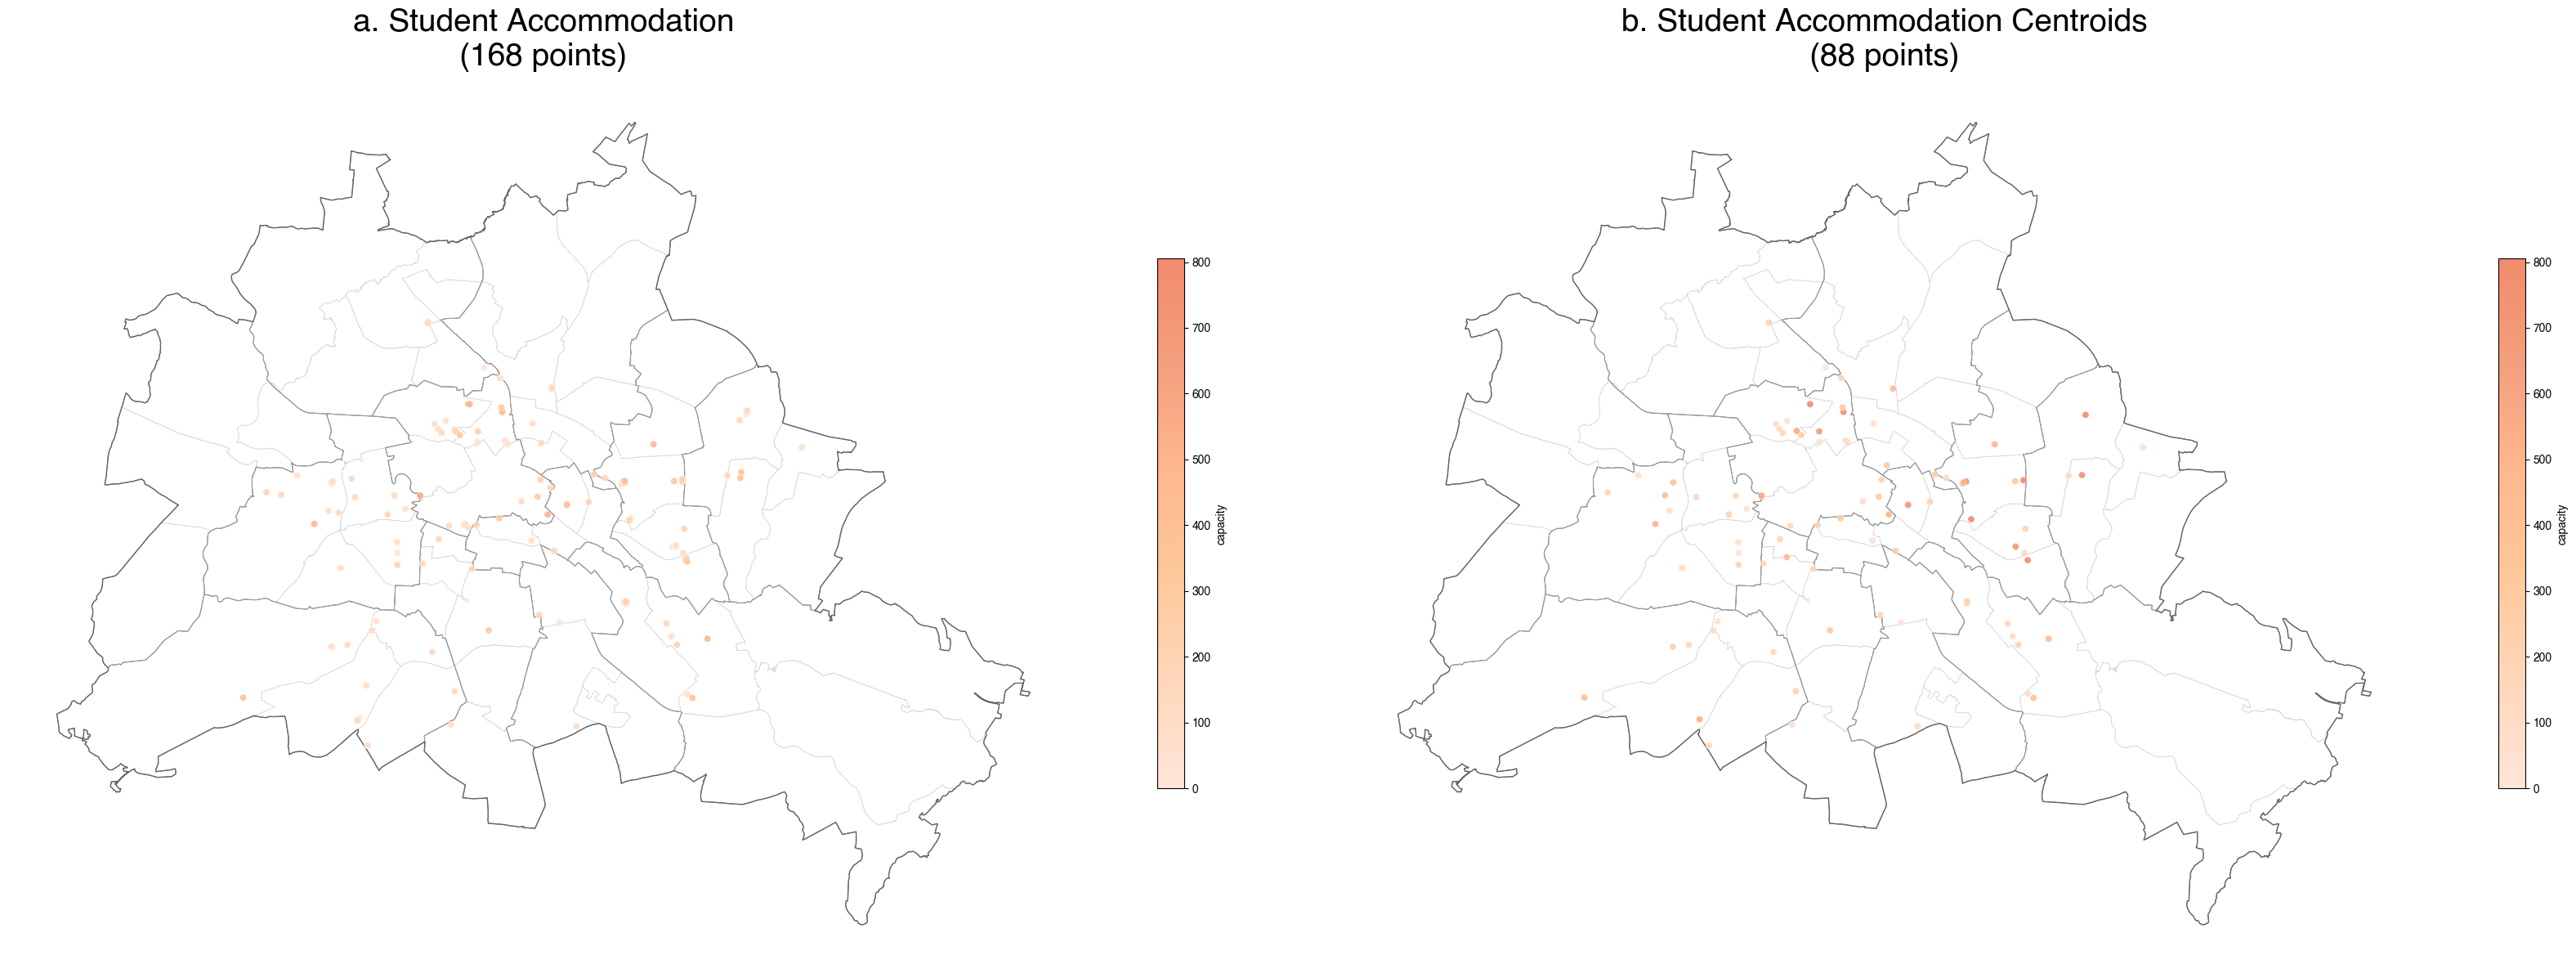

In [24]:
fig, axs  = plt.subplots(1, 2, figsize=(36, 12))

pgr.plot(ax=axs[0], facecolor='none', edgecolor='#cccccc', linewidth=0.5, linestyle="--")
bz.plot(ax=axs[0], facecolor='none', edgecolor='#999999', linewidth=0.75)
out.plot(ax=axs[0], facecolor='none', edgecolor='#666666', linewidth=1)
pbsa.plot(ax=axs[0],
          column='!cap',
          cmap=cmap_or,
          markersize = 35,  # Scale marker size
          alpha=0.9,
          edgecolor='white',
          linewidth=0.3,
          legend=True,
          legend_kwds={'shrink': 0.6, 'label': "capacity"},
          vmin=0,
          vmax=pbsa_c['!cap'].quantile(0.95))  # Cap extremes
axs[0].set_title(f'a. Student Accommodation\n({len(pbsa)} points)', fontsize=28, pad=15, fontweight='bold')
axs[0].set_axis_off()
plt.tight_layout()

pgr.plot(ax=axs[1], facecolor='none', edgecolor='#cccccc', linewidth=0.5, linestyle="--")
bz.plot(ax=axs[1], facecolor='none', edgecolor='#999999', linewidth=0.75)
out.plot(ax=axs[1], facecolor='none', edgecolor='#666666', linewidth=1)
pbsa_c.plot(ax=axs[1],
          column='!cap',
          cmap=cmap_or,
          markersize = 35,
          alpha=0.9,
          edgecolor='white',
          linewidth=0.3,
          legend=True,
          legend_kwds={'shrink': 0.6, 'label': "capacity"},
          vmin=0,
          vmax=pbsa_c['!cap'].quantile(0.95)) # Matching Previous plott
axs[1].set_title(f"b. Student Accommodation Centroids\n({len(pbsa_c)} points)", fontsize=28, pad=15, fontweight='bold')
axs[1].set_axis_off()

save_path = os.path.join(hf, "Student Accommodation.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

*Figure XX. Visual Comparison Initial Unique Student Accommodation Addresses with Final Centroids*

It should be noted that unique addresses were collected specifically for the correct calculation of centroids. Meanwhile, for student communities, the calculation of centroids is relatively simple due to the unique names for each community and the proximity of its buildings. For universities, however, the task is not so straightforward, as grouping by name will not give the desired result, since a university with the same name may be located in different parts of the city, for example, Humboldt-Universität, which has three campuses: Campus Mitte, Campus Adlershof, and Campus Nord.

**Higher Education Universities**

Higher Education Universities' demand for each educational institution is calculated as the number of international students enrolled in it. Universities for which there is no data on students are excluded. 

In [25]:
uni = uni.dropna(subset=['!s_all'])

Afterwards, there is a transition from unique addresses to centroids (Figure XX). For this purpose, grouping by code (`uni[“code”]`) is performed, while demand indicators: the number of German students (`!s_de`), the number of foreign students (`!s_aus`) and the total number of students (`!s_all`) are distributed evenly among unique addresses — buildings — with a single unique code (`for code in uni[“code”].unique()`). This allows us to obtain an ‘average’ representation of the demand indicators for each individual building, while these data for different buildings are initially combined. 

In [26]:
copy_cols = ['abr', 'name', 'fname', 'own', 'stud', 'url']
split_cols = ['!s_de', '!s_aus', '!s_all']

# Loop over unique codes
for code in uni['code'].unique():
    mask = uni['code'] == code
    group = uni[mask]
    
    # Copy values from first row in group
    for col in copy_cols:
        uni.loc[mask, col] = group.iloc[0][col]
    
    # Distribute numeric values
    for col in split_cols:
        if pd.notnull(group.iloc[0][col]):
            uni.loc[mask, col] = round(group.iloc[0][col] / len(group), 2)
        else:
            uni.loc[mask, col] = pd.NA

To further transition from unique addresses to a single address for a complex of university buildings, the data were grouped based on a distance threshold. The threshold parameter was responsible for separating unique addresses belonging to the same university campus based on the spatial factor. The threshold value was obtained through multiple manual tests. At the same time, the demand values for each unique address were summed up. 

In [27]:
distance_threshold = 650  # in meters
records = []

for code, group in uni.groupby("code"):
    coords = np.array([(geom.x, geom.y) for geom in group.geometry])
    if len(coords) == 0:
        continue
    # Cluster points that are close to each other
    clustering = DBSCAN(eps=distance_threshold, min_samples=1).fit(coords)
    group = group.copy()
    group['cluster'] = clustering.labels_
    for cluster_id, cluster_points in group.groupby('cluster'):
        mp = MultiPoint(cluster_points.geometry.tolist())
        # Prepare a record with all columns
        record = cluster_points.iloc[0].to_dict()
        record['geometry'] = mp.centroid
        # Sum the specified columns
        for col in ['!s_de', '!s_aus', '!s_all']:
            record[col] = cluster_points[col].sum()
        record['cluster'] = f"{code}_{cluster_id+1}"
        records.append(record)

# Create the GeoDataFrame
uni_c = gpd.GeoDataFrame(records, geometry='geometry', crs=uni.crs)

Thus, unique addresses for individual buildings were grouped not only by code but also by university campus affiliation. Next, geometric centers (centroids) were calculated for each group. This resulted in a transition from 357 points to 54 centroids.

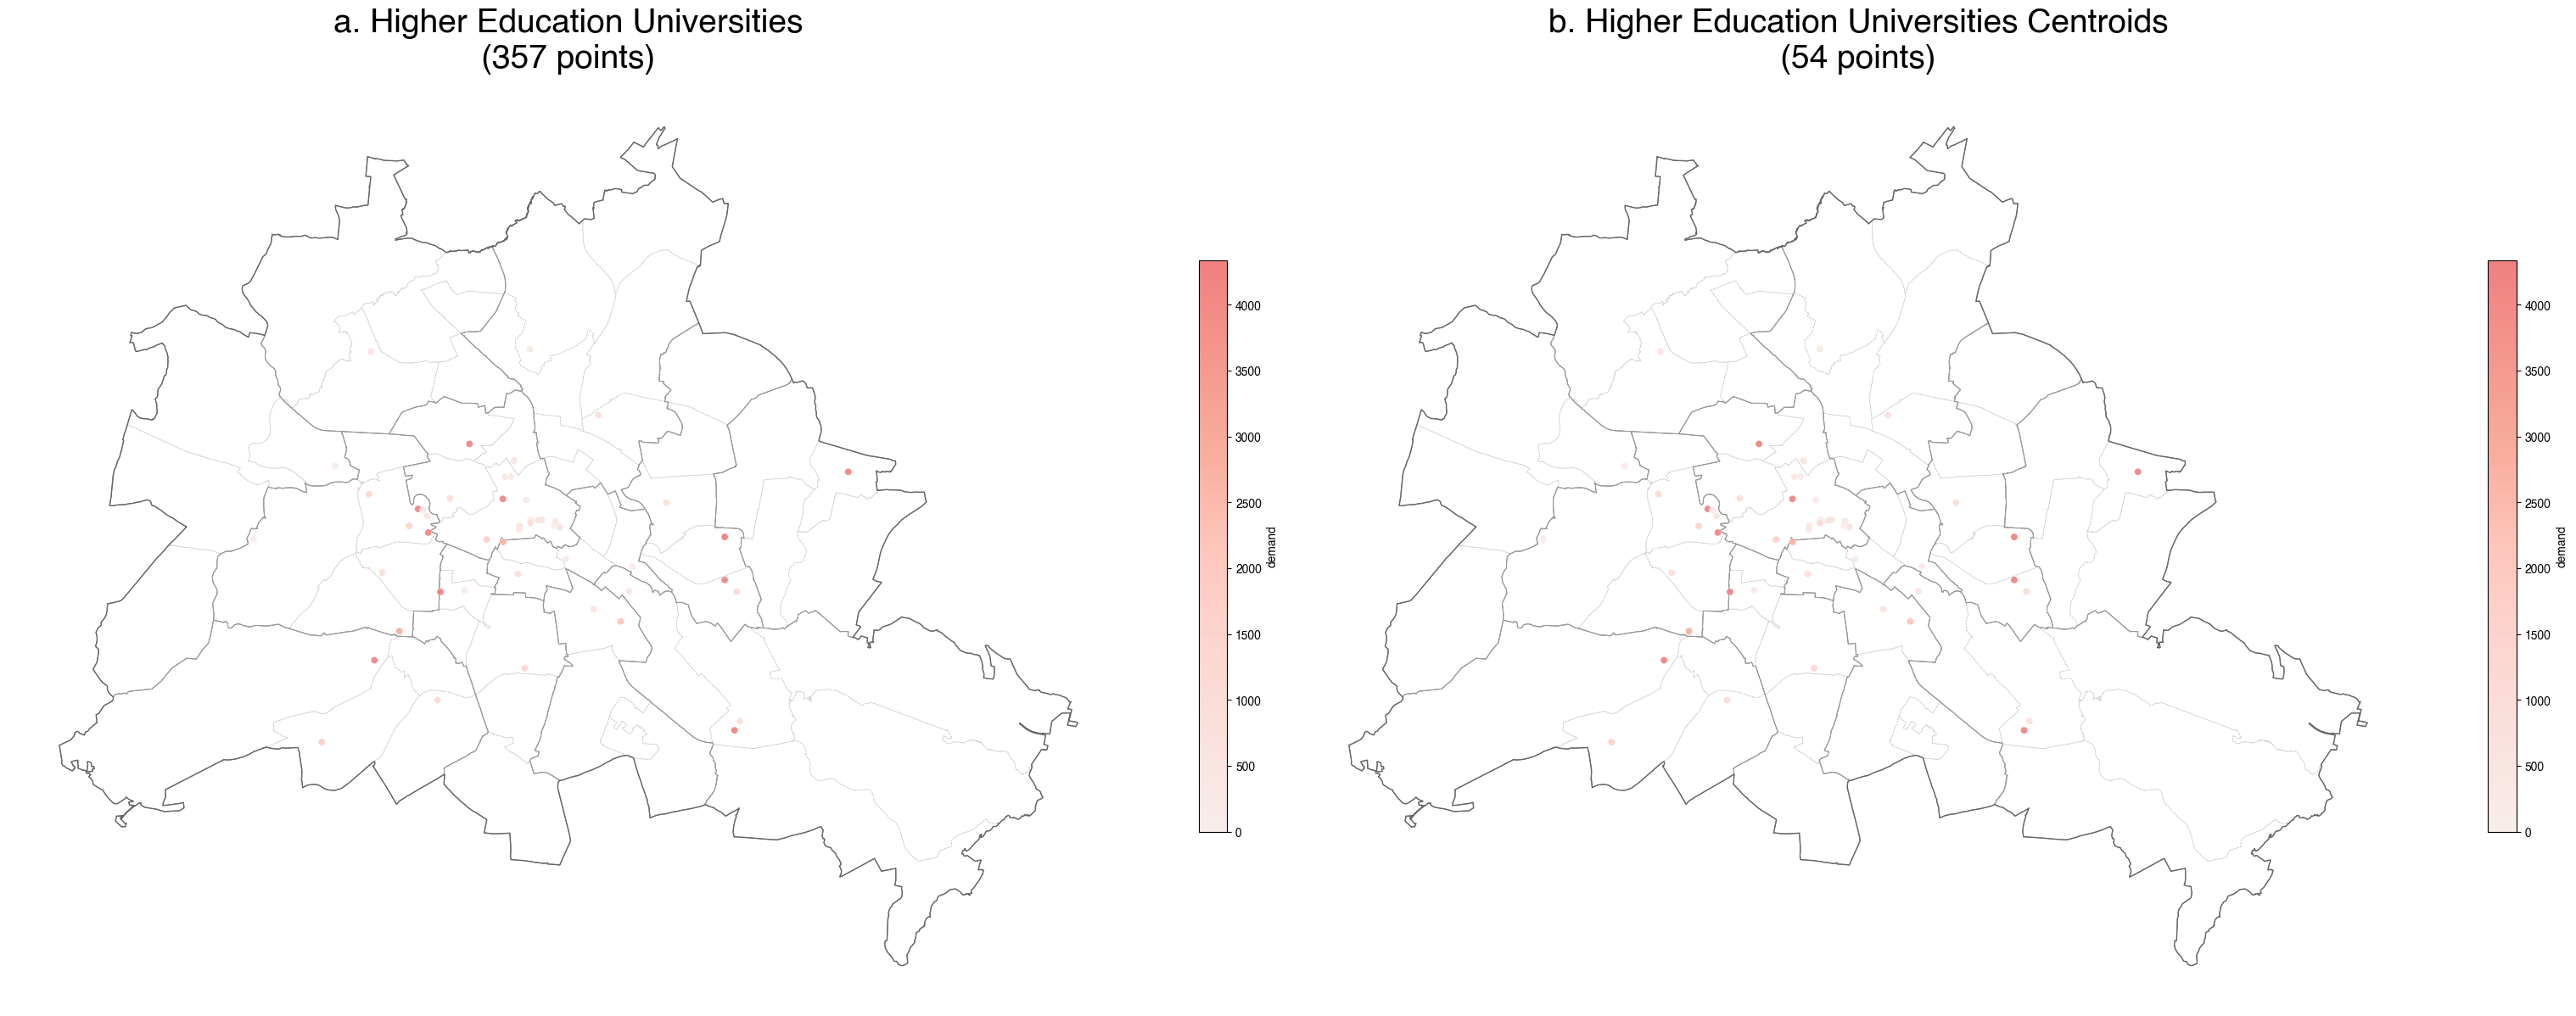

In [28]:
fig, axs  = plt.subplots(1, 2, figsize=(32, 12))

pgr.plot(ax=axs[0], facecolor='none', edgecolor='#cccccc', linewidth=0.5, linestyle="--")
bz.plot(ax=axs[0], facecolor='none', edgecolor='#999999', linewidth=0.75)
out.plot(ax=axs[0], facecolor='none', edgecolor='#666666', linewidth=1)
uni.plot(ax=axs[0],
          column='!s_all',
          cmap=cmap_pi,
          markersize = 35,  # Scale marker size
          alpha=0.9,
          edgecolor='white',
          linewidth=0.3,
          legend=True,
          legend_kwds={'shrink': 0.6, 'label': "demand"},
          vmin=0,
          vmax=uni_c['!s_all'].quantile(0.85))  # Cap extremes
axs[0].set_title(f'a. Higher Education Universities\n({len(uni_copy)} points)', fontsize=28, pad=15, fontweight='bold')
axs[0].set_axis_off()
plt.tight_layout()

pgr.plot(ax=axs[1], facecolor='none', edgecolor='#cccccc', linewidth=0.5, linestyle="--")
bz.plot(ax=axs[1], facecolor='none', edgecolor='#999999', linewidth=0.75)
out.plot(ax=axs[1], facecolor='none', edgecolor='#666666', linewidth=1)
uni_c.plot(ax=axs[1],
          column='!s_all',
          cmap=cmap_pi,
          markersize = 35,
          alpha=0.9,
          edgecolor='white',
          linewidth=0.3,
          legend=True,
          legend_kwds={'shrink': 0.6, 'label': "demand"},
          vmin=0,
          vmax=uni_c['!s_all'].quantile(0.85)) # Matching Previous plott
axs[1].set_title(f"b. Higher Education Universities Centroids\n({len(uni_c)} points)", fontsize=28, pad=15, fontweight='bold')
axs[1].set_axis_off()

save_path = os.path.join(hf, "Higher Education Universities.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

*Figure XX. Visual Comparison Initial Unique Higher Education Universities Addresses with Final Centroids*

The verification method was a manual visual comparison of the final centroids with the original unique addresses in QGIS using the Measure Tool. 

### Data Export 

The processed data for analysing the capacity and demand for student housing is stored in geographic packages (`.gpkg`) — an open format for storing geospatial data, which differs from the tabular format (`.exel`) in that it contains coordinates. 

In [29]:
ef = r"../outputs/2.2_urban_data_mining/pbsa.gpkg"
pbsa.to_file(ef, driver="GPKG")

ef = r"../outputs/2.2_urban_data_mining/pbsa_c.gpkg"
pbsa_c.to_file(ef, driver="GPKG")

ef = r"../outputs/2.2_urban_data_mining/uni.gpkg"
uni_copy.to_file(ef, driver="GPKG")

cf = r"../outputs/2.2_urban_data_mining/uni_c.gpkg"
uni_c.to_file(cf, driver="GPKG")